Discribtion about data:
Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

### EDA

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

In [ ]:
df=pd.read_csv('/content/cardio_train.csv',sep=";")

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.shape

(70000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Get some statistical Info

In [ ]:
df.describe(include='all').style.background_gradient(axis=None, cmap='YlOrRd')


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

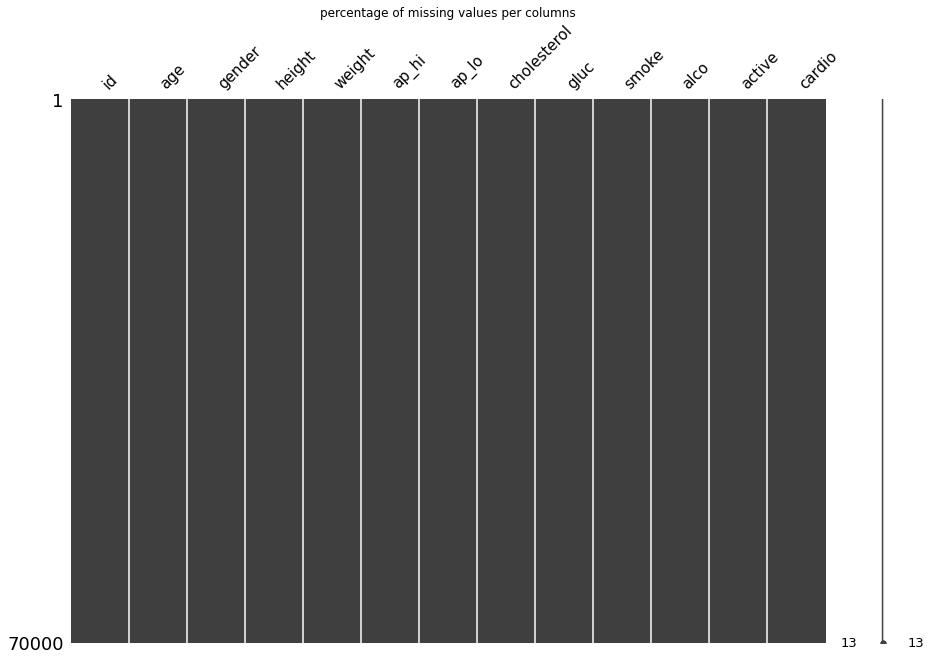

In [ ]:
msno.matrix(df,figsize=(15,10),fontsize=15)
plt.title('percentage of missing values per columns')
plt.show()

In [ ]:
df.duplicated().sum()

0

Convert age from days to years

In [ ]:
df['age'] = round(df['age']/365.25,2)

In [ ]:
df.drop(['id'],axis=1,inplace=True)

In [ ]:
df 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.36,2,168,62.0,110,80,1,1,0,0,1,0
1,55.38,1,156,85.0,140,90,3,1,0,0,1,1
2,51.63,1,165,64.0,130,70,3,1,0,0,0,1
3,48.25,2,169,82.0,150,100,1,1,0,0,1,1
4,47.84,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.68,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.88,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.20,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.41,1,163,72.0,135,80,1,2,0,0,0,1


Maping gender to 0,1

woman 0

man  1

In [ ]:
df['gender']=np.where(df['gender']==2,1,0)

In [ ]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.36,1,168,62.0,110,80,1,1,0,0,1,0
1,55.38,0,156,85.0,140,90,3,1,0,0,1,1
2,51.63,0,165,64.0,130,70,3,1,0,0,0,1
3,48.25,1,169,82.0,150,100,1,1,0,0,1,1
4,47.84,0,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.68,1,168,76.0,120,80,1,1,1,0,1,0
69996,61.88,0,158,126.0,140,90,2,2,0,0,1,1
69997,52.20,1,183,105.0,180,90,3,1,0,1,0,1
69998,61.41,0,163,72.0,135,80,1,2,0,0,0,1


### Visualization

In [ ]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

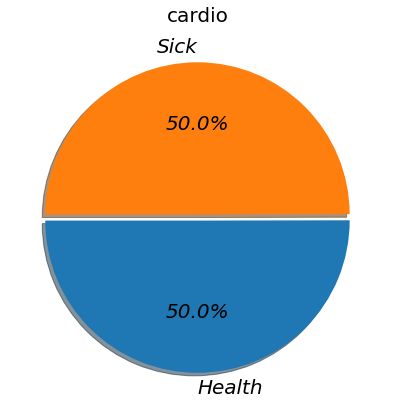

In [ ]:
pie=df["cardio"].value_counts()
plt.figure(figsize=(7,7))

plt.pie(pie, labels=["Health", "Sick"],
        explode=[0.02,0.02],
        startangle=180,
        autopct='%1.1f%%',shadow=True, 
        textprops={"fontsize":20, "style":"italic"})

plt.title('cardio', fontsize=20)
plt.show()

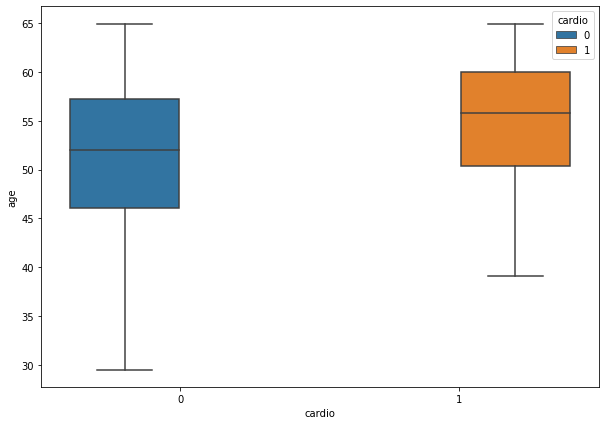

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(x='cardio',y='age',hue='cardio',data=df)


The patient age's increase from 50 years

Show the ration of cholesterol which

 1: normal,

 2: above normal,
 
  3: well above normal

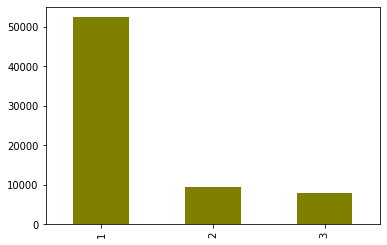

In [ ]:
df['cholesterol'].value_counts().plot.bar(color='olive')

The most of sick and halth have the normal ratio of cholestrol 

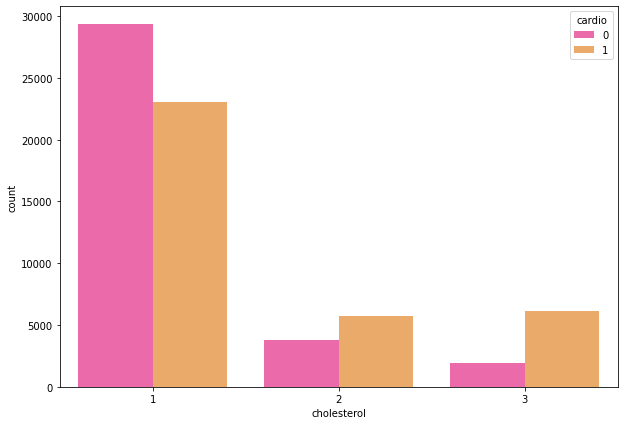

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='cholesterol',hue='cardio',data=df,palette="spring")

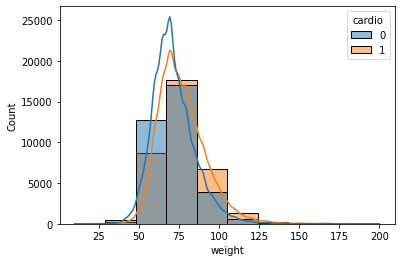

In [ ]:
sns.histplot(data=df,x="weight",hue="cardio",kde=True,bins=10)
plt.show()

Here notcied the weight affected om disease

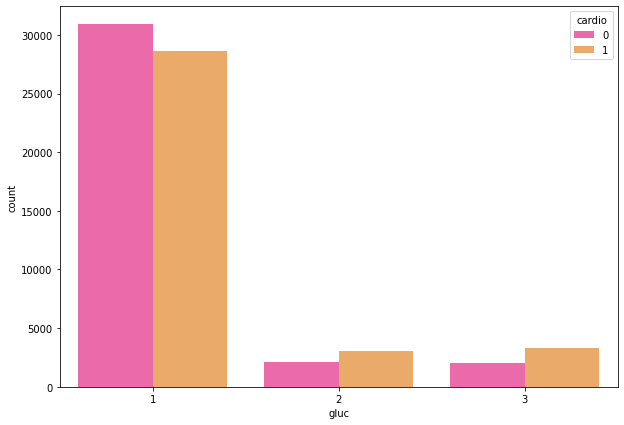

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='gluc',hue='cardio',data=df,palette="spring")

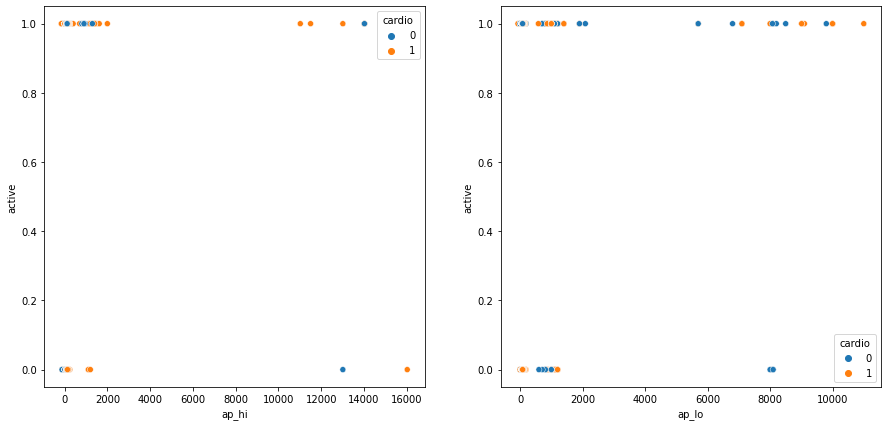

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot(x='ap_hi',y='active',hue='cardio',data=df)
plt.subplot(1,2,2)
sns.scatterplot(x='ap_lo',y='active',hue='cardio',data=df)
plt.show()


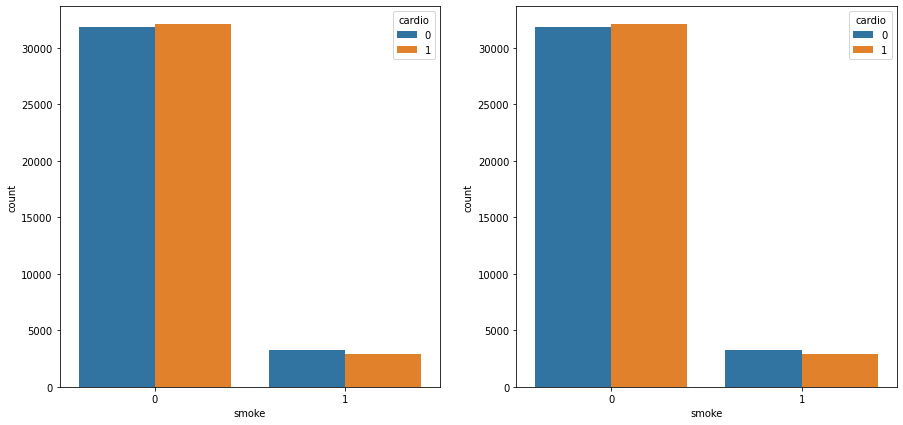

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(data=df, x='smoke', hue="cardio")
plt.subplot(1,2,2)
sns.countplot(data=df, x='smoke',hue="cardio")
plt.show()

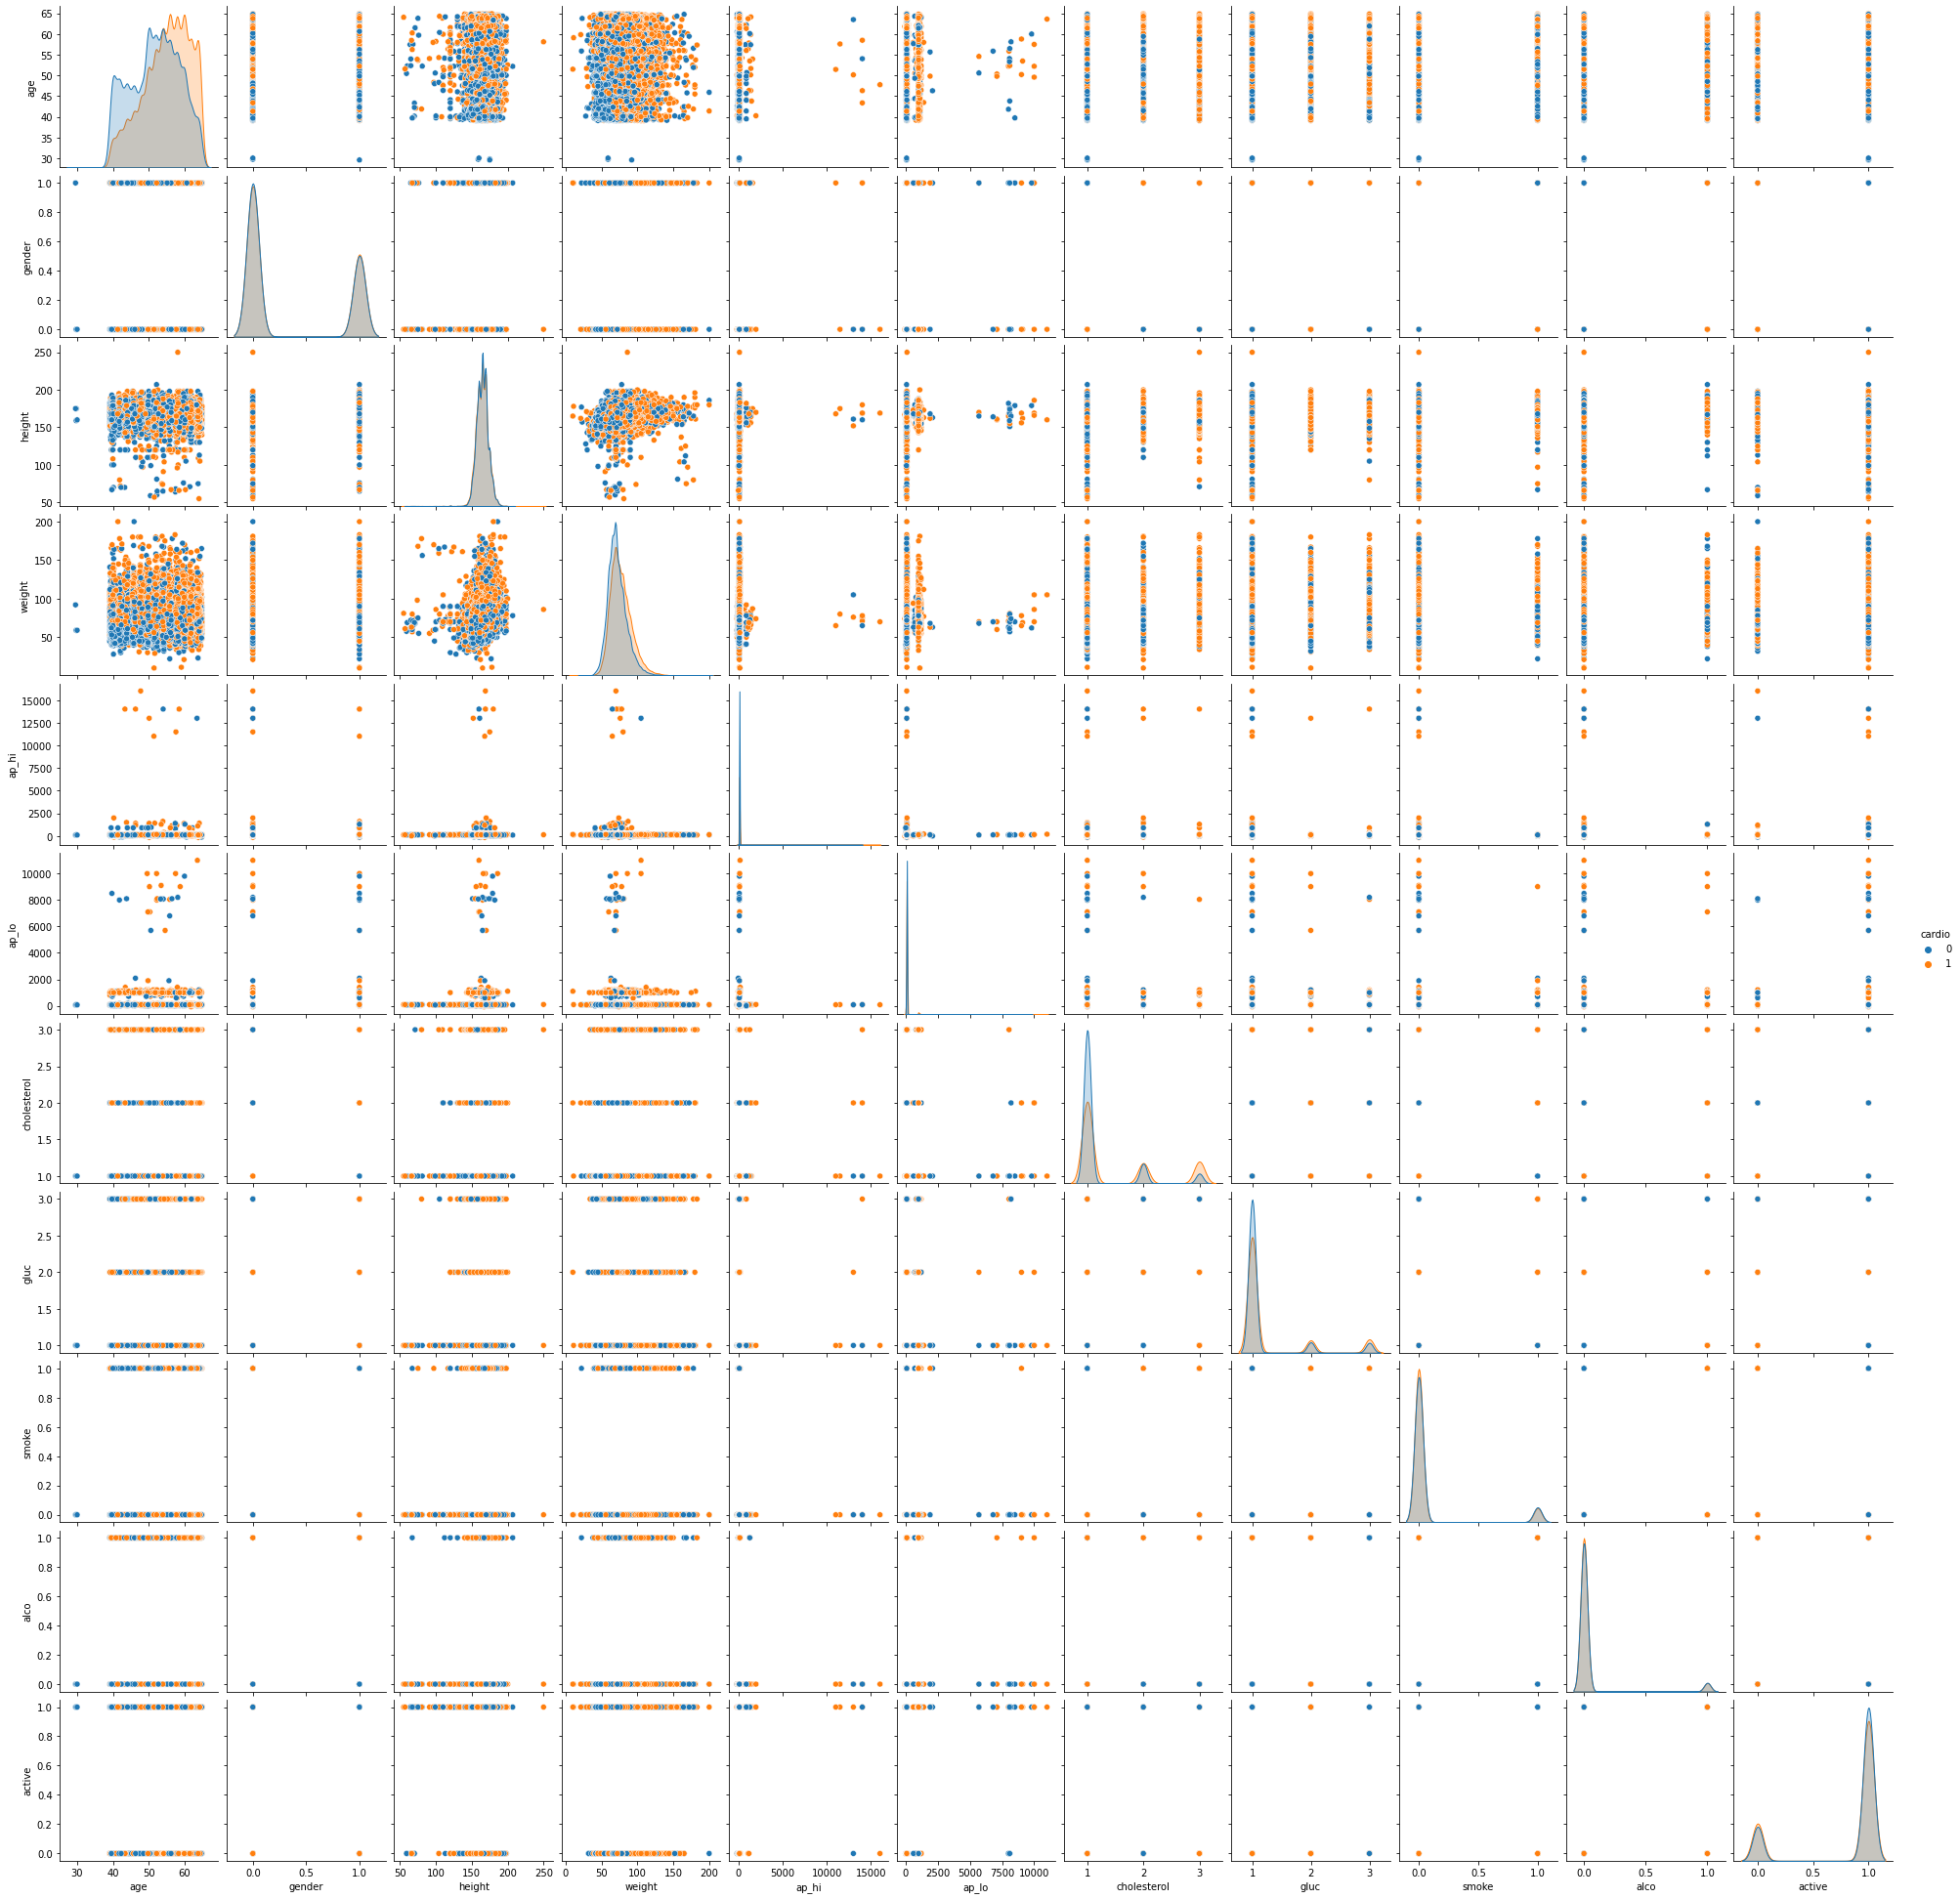

In [ ]:
sns.pairplot(data=df, hue="cardio")

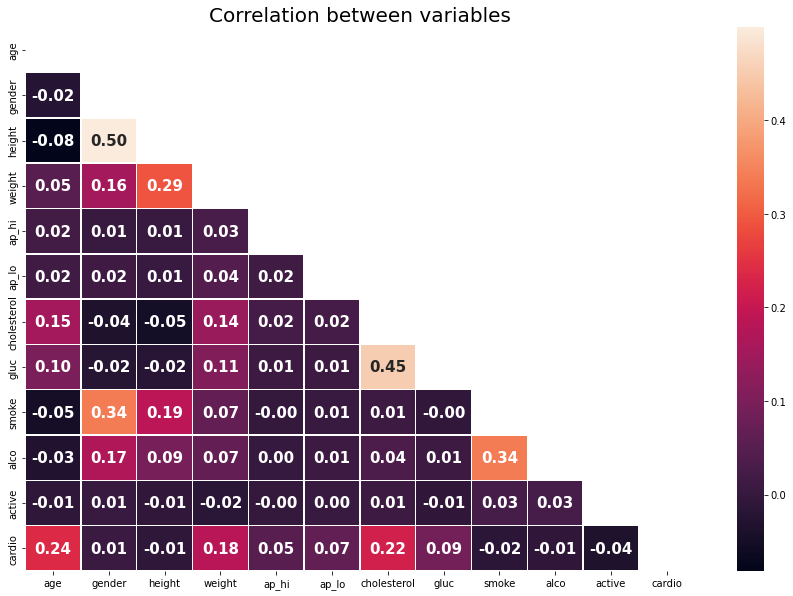

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Correlation between variables", fontsize=20)
corr = df.corr()
mask = np.triu(corr)
sns.heatmap(corr, linewidths=0.5, 
            annot=True, mask = mask,
            fmt=".2f", annot_kws={"fontsize":15, "weight":'bold'}).set_facecolor('white')
plt.show()

### Feature selection 

Using ExtraTreesClassifier method it will help to give the importance of each independent feature with a dependent feature.

In [ ]:
#select all columns
X = df.iloc[:,0:13] 
#select target column 
y = df.iloc[:,-1] 

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model =ExtraTreesClassifier()
model.fit(X,y)


ExtraTreesClassifier()

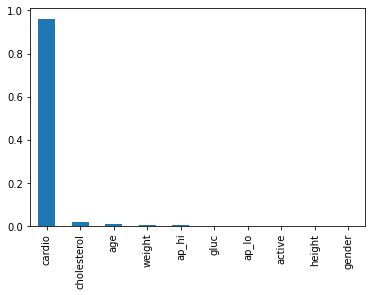

In [ ]:
feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(10).plot(kind='bar')
plt.show()

### Data Preprocessing

*** we have catgorical nominal columns already in one-hot encoding

 df['gender,  'cholestroel',  'gluc',  'somke',  'slco',  'active',  'cardio'] 

so we do Normalization in numerical columns 

df['age',  'hight',  'weight','ap_hi,  'ap_lo']***


In [ ]:

X = df.iloc[:,:-1] 

y = df.iloc[:,-1]  

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

when use this code *** 

```
# sc = StandardScaler()
cols_to_scale = ['age','weight', 'ap_hi']
X_train[cols_to_scale] = sc.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = sc.transform(X_test[cols_to_scale])
```


***Increase the number of iterations (max_iter) or scale the data as shown ,so try to standerscale all data

In [ ]:
sc = StandardScaler()
cat_col = ['age', 'weight', 'ap_hi']
X_train.loc[:, cat_col] = sc.fit_transform(X_train.loc[:, cat_col])
X_test.loc[:, cat_col] = sc.transform(X_test.loc[:, cat_col])

In [ ]:
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
46738,-1.431281,0,171,-0.778934,-0.057674,80,1,1,0,0,1
67455,-0.580161,0,175,1.373752,0.072341,110,1,1,0,1,1
48677,1.345590,0,165,-0.987258,-0.122682,70,1,1,0,0,1
38513,-1.739164,0,165,-1.681673,-0.122682,70,1,1,0,0,0
30003,1.594265,0,144,0.054364,0.007334,80,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
21243,1.546899,0,158,0.123806,-0.057674,80,3,3,0,0,0
45891,1.570582,1,170,3.318113,0.007334,80,3,3,0,1,1
42613,1.181287,1,174,-0.153960,-0.057674,80,1,1,0,0,1
43567,-0.466185,0,153,0.748779,-0.057674,80,1,1,0,0,1


In [ ]:
y_train

46738    0
67455    1
48677    0
38513    0
30003    1
        ..
21243    1
45891    1
42613    0
43567    0
68268    1
Name: cardio, Length: 63000, dtype: int64

### Feature Engineering

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create a new feature matrix with polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

### Modeling

In [ ]:
from sklearn.linear_model import Ridge

# create Ridge model with regularization
ridge = Ridge(alpha=0.1)

# fit the model
ridge.fit(X, y)

Ridge(alpha=0.1)

In [ ]:
#logistic Regression 
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=300,random_state = 0)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=300, random_state=0)

In [ ]:
y_train_acc = clf.score(X_train, y_train)
y_test_acc = clf.score(X_test, y_test)
print(f'train_score:{y_train_acc}\ntest_score: {y_test_acc}')

train_score:0.7235714285714285
test_score: 0.7214285714285714


In [ ]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_train_acc = clf.score(X_train, y_train)
y_test_acc = clf.score(X_test, y_test)
print(f'train_score:{y_train_acc}\ntest_score: {y_test_acc}')

train_score:0.7668035714285715
test_score: 0.6482857142857142


In [ ]:
#Decision Support Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_train_acc = clf.score(X_train, y_train)
y_test_acc = clf.score(X_test, y_test)
print(f'train_score:{y_train_acc}\ntest_score: {y_test_acc}')

train_score:0.9993492063492063
test_score: 0.6347142857142857


In [ ]:
#RandomForeest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_train_acc = clf.score(X_train, y_train)
y_test_acc = clf.score(X_test, y_test)
print(f'train_score:{y_train_acc}\ntest_score: {y_test_acc}')

train_score:0.9793650793650793
test_score: 0.6924285714285714


In [ ]:
y_train_acc = clf.score(X_train, y_train)
y_test_acc = clf.score(X_test, y_test)
print(f'train_score:{y_train_acc}\ntest_score: {y_test_acc}')

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_train_acc = clf.score(X_train, y_train)
y_test_acc = clf.score(X_test, y_test)
print(f'train_score:{y_train_acc}\ntest_score: {y_test_acc}')

train_score:0.5876071428571429
test_score: 0.5891428571428572


In [ ]:
#SVM
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', random_state = 0)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_train_acc = clf.score(X_train, y_train)
y_test_acc = clf.score(X_test, y_test)
print(f'train_score:{y_train_acc}\ntest_score: {y_test_acc}')

train_score:0.7240714285714286
test_score: 0.7212142857142857


In [ ]:
#SvM_K
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_train_acc = clf.score(X_train, y_train)
y_test_acc = clf.score(X_test, y_test)
print(f'train_score:{y_train_acc}\ntest_score: {y_test_acc}')

train_score:0.7240714285714286
test_score: 0.7212142857142857
